In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_arrays import create_arr

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f1.sav',verbose=False,python_dict=False)
tube2 = readsav('/Users/WilliamHenryAshfieldIV/dat/f1_large_vis.sav',verbose=False,python_dict=False)
tube5 = readsav('/Users/WilliamHenryAshfieldIV/dat/f1_vis5.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f1_si_iv_nei.sav',verbose=False,python_dict=False)
frac2 = readsav('/Users/WilliamHenryAshfieldIV/dat/f1_lrgV_si_iv_nei.sav',verbose=False,python_dict=False)
frac5 = readsav('/Users/WilliamHenryAshfieldIV/dat/f1_vis5_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
ti = 355

In [4]:
arrs = create_arr(tube,frac,log10T,log10G,time=ti)
arrs2 = create_arr(tube2,frac2,log10T,log10G,time=ti)
arrs5 = create_arr(tube5,frac5,log10T,log10G,time=ti)

x, x2, x5 = arrs['x'], arrs2['x'], arrs5['x']
v, v2, v5 = arrs['v'], arrs2['v'], arrs5['v']
T, T2, T5 = arrs['T'], arrs2['T'], arrs5['T']
ne, ne2, ne5 = arrs['ne'], arrs2['ne'], arrs5['ne']
wav, wav2, wav5 = arrs['wav'], arrs2['wav'], arrs5['wav']
spec, spec2, spec5 = arrs['spec'], arrs2['spec'], arrs5['spec']
EM, EM2, EM5 = arrs['EM'], arrs2['EM'], arrs5['EM']
g, g2, g5 = arrs['g'], arrs2['g'], arrs5['g']
fac, fac2, fac5 = arrs['fac'], arrs2['fac'], arrs5['fac']

/Users/WilliamHenryAshfieldIV/synth_spec/create_arrays.py:99: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi


In [5]:
los_v = tube.tarr.v[ti].T[0]
los_x = tube.tarr.x[ti].T[0]
los_v2 = tube2.tarr.v[ti].T[0]
los_x2 = tube2.tarr.x[ti].T[0]
los_v5 = tube5.tarr.v[ti].T[0]
los_x5 = tube5.tarr.x[ti].T[0]

t = tube.tarr.t[ti]
t2 = tube2.tarr.t[ti]
t5 = tube5.tarr.t[ti]

(6, 8)

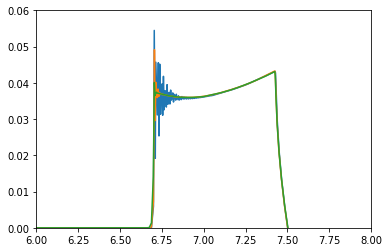

In [6]:
plt.plot(los_x,-los_v,los_x2,-los_v2,los_x5,-los_v5)
plt.ylim(0,0.06)
plt.xlim(6,8)

(6, 8)

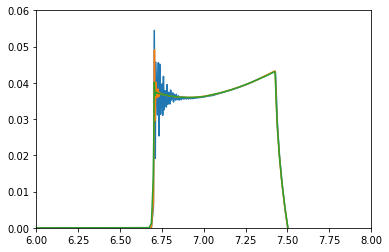

In [7]:
plt.plot(x,v,x2,v2,x5,v5)
plt.ylim(0,0.06)
plt.xlim(6,8)

(0.02, 0.04)

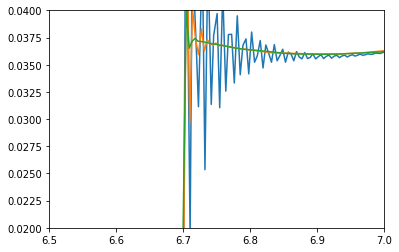

In [8]:
plt.plot(los_x,-los_v,los_x2,-los_v2,los_x5,-los_v5)
plt.xlim(6.5,7)
plt.ylim(0.02,0.04)

(0.02, 0.04)

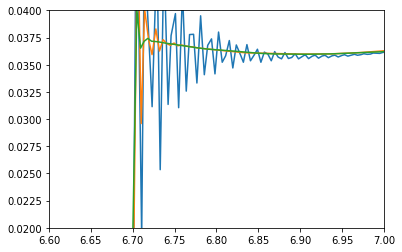

In [9]:
plt.plot(x,v,x2,v2,x5,v5)
plt.xlim(6.6,7)
plt.ylim(0.02,0.04)

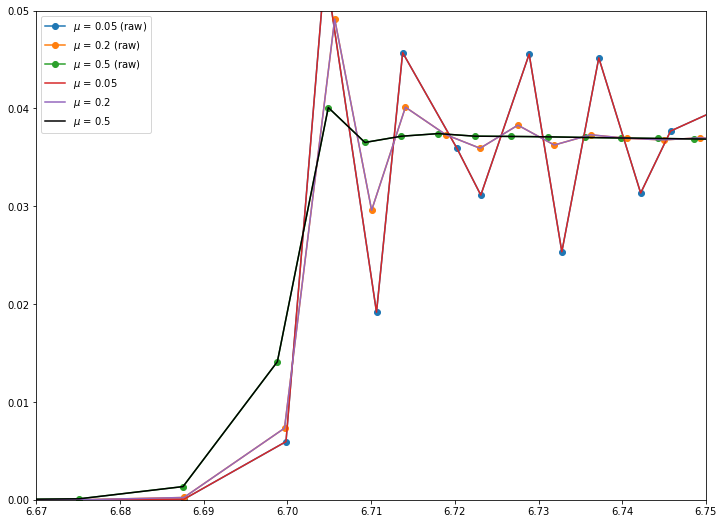

In [10]:
fig = plt.figure(figsize=(12,9))
plt.plot(los_x,-los_v, label = '$\mu$ = 0.05 (raw)',marker='o')
plt.plot(los_x2,-los_v2, label = '$\mu$ = 0.2 (raw)',marker='o')
plt.plot(los_x5,-los_v5, label = '$\mu$ = 0.5 (raw)',marker='o')
plt.plot(x,v, label = '$\mu$ = 0.05')
plt.plot(x2,v2, label = '$\mu$ = 0.2')
plt.plot(x5,v5, label = '$\mu$ = 0.5',color ='black')
plt.xlim(6.67,6.75)
plt.ylim(0.0,0.05)
plt.legend()

(0, 120000.0)

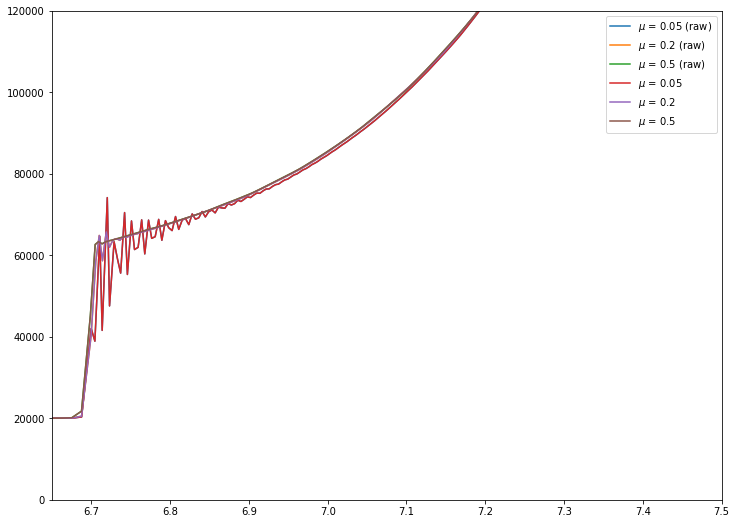

In [11]:
fig = plt.figure(figsize=(12,9))
plt.plot(los_x,t*1e6, label = '$\mu$ = 0.05 (raw)')
plt.plot(los_x2,t2*1e6, label = '$\mu$ = 0.2 (raw)')
plt.plot(los_x5,t5*1e6, label = '$\mu$ = 0.5 (raw)')
plt.plot(x,T*1e6, label = '$\mu$ = 0.05')
plt.plot(x2,T2*1e6, label = '$\mu$ = 0.2')
plt.plot(x5,T5*1e6, label = '$\mu$ = 0.5')

plt.legend()
plt.xlim(6.65,7.5)
plt.ylim(0,1.2*1e5)

(1402.5, 1404)

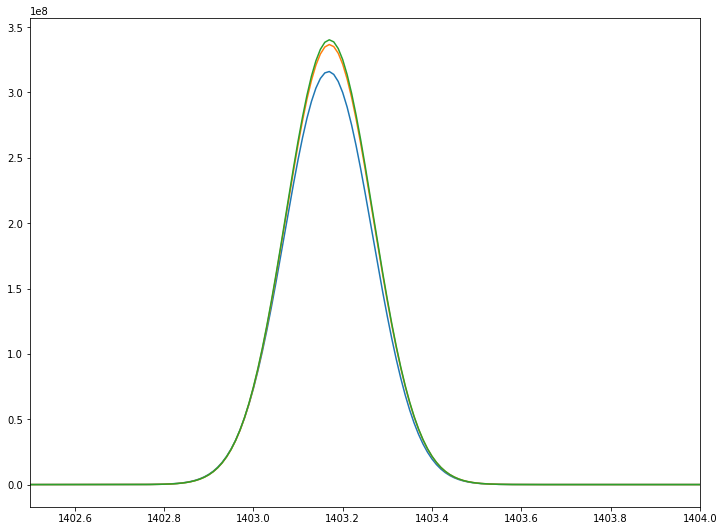

In [12]:
fig = plt.figure(figsize=(12,9))
plt.plot(wav,spec,wav2,spec2,wav5,spec5)
plt.xlim(1402.5,1404)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


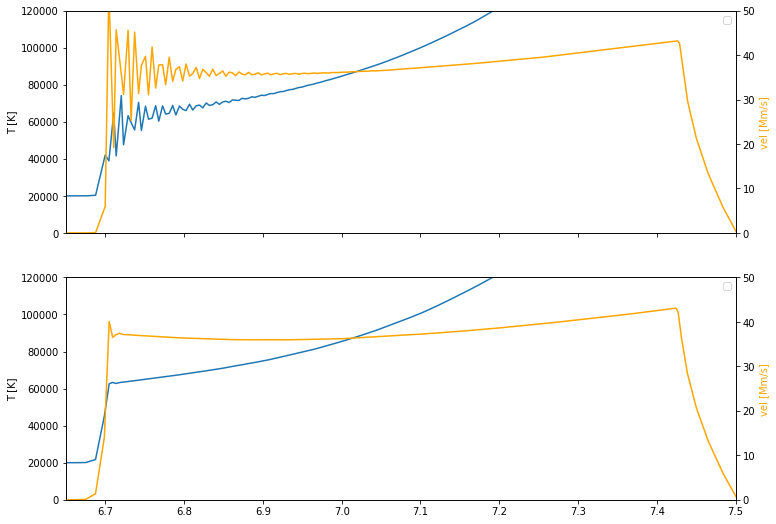

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True,figsize=(12,9))
ax1.plot(x,T*1e6)
ax1.set_xlim(6.65,7.5)
ax1.set_ylim(0,1.2*1e5)
ax1.set_ylabel('T [K]')

ax3 = ax1.twinx()
ax3.plot(x, v*1e3,color = 'orange')
ax3.set_ylabel('vel [Mm/s]',color = 'orange')  # we already handled the x-label with ax1
ax3.set_ylim(0.0,50)
plt.legend()

ax2.plot(x5,T5*1e6)
ax2.set_xlim(6.65,7.5)
ax2.set_ylim(0,1.2*1e5)
ax2.set_ylabel('T [K]')

ax4 = ax2.twinx()
ax4.plot(x5, v5*1e3,color = 'orange')
ax4.set_ylabel('vel [Mm/s]',color = 'orange')  # we already handled the x-label with ax1
ax4.set_ylim(0.0,50)
plt.legend()

In [14]:
ne /= ne[0]
ne2 /= ne2[0]
ne5 /= ne5[0]

(0, 0.22)

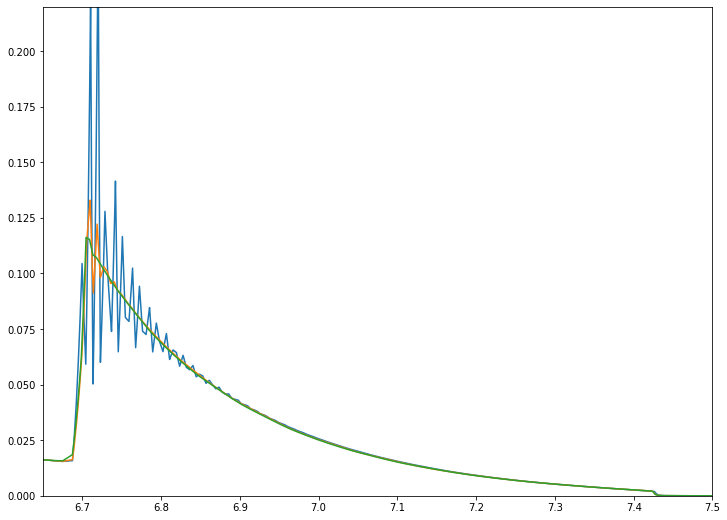

In [15]:
fig = plt.figure(figsize=(12,9))
plt.plot(x,ne**2,x2,ne2**2,x5,ne5**2)
plt.xlim(6.65,7.5)
plt.ylim(0,0.22)

(6.65, 7.5)

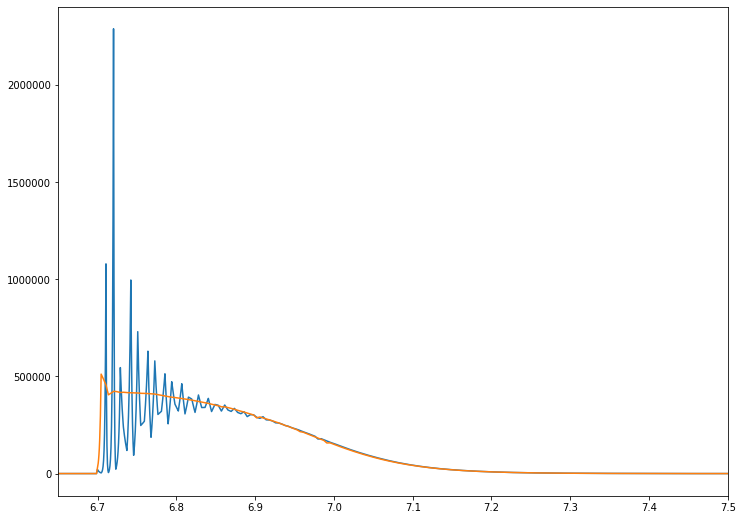

In [16]:
fig = plt.figure(figsize=(12,9))

plt.plot(x,EM*10**g*fac)
plt.plot(x,EM5*10**g5*fac5)

plt.xlim(6.65,7.5)

In [17]:
arrs5 = create_arr(tube,frac,log10T,log10G,time=55)
wav = arrs5['wav']
spec = arrs5['spec']

(1402.5, 1404)

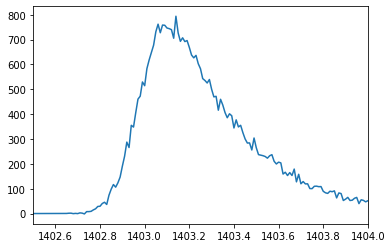

In [18]:
plt.plot(wav,spec)
plt.xlim(1402.5,1404)